___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with 🏷️ ***SMOTE*** make it ready to deploy. Furthermore, use 🏷️ ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries* 
    
    *ii. Ingest Data * 
    
    *iii. Explore Data* 
    
    *iv. Outlier Detection* 
    
    *v.  Drop unnecessary features* 

#### 2. Data Preprocessing
- Scale (if needed) 
- Separete the data frame for evaluation purposes 

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from scipy import stats
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    make_scorer,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    average_precision_score,
    roc_curve,
    auc,
)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.width", 1000)

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

In [2]:
df_male = pd.read_csv('https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr',encoding='latin-1')
df_female = pd.read_csv('https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq')
new_df = pd.concat([df_female,df_male])
new_df

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0       10037.0                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1       10038.0                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2       10042.0                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3       10043.0               

## Explore Data

In [3]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6068 entries, 0 to 4081
Columns: 109 entries, SubjectId to subjectid
dtypes: float64(2), int64(98), object(9)
memory usage: 5.1+ MB


In [4]:
new_df.describe().T

count          mean           std      min       25%      50%       75%       max
SubjectId                       1986.0  22306.606244  20904.730297  10037.0  17667.00  22096.5  26089.75  920103.0
abdominalextensiondepthsitting  6068.0    246.468688     37.400106    155.0    219.00    242.0    271.00     451.0
acromialheight                  6068.0   1406.161338     79.091048   1115.0   1350.00   1410.0   1462.00    1683.0
acromionradialelength           6068.0    327.374423     20.720018    249.0    313.00    328.0    341.25     393.0
anklecircumference              6068.0    224.891397     16.051833    156.0    214.00    225.0    235.00     293.0
axillaheight                    6068.0   1299.608767     72.022286   1038.0   1249.00   1302.0   1349.00    1553.0
balloffootcircumference         6068.0    244.192650     16.845020    186.0    232.00    245.0    256.00     306.0
balloffootlength                6068.0    194.754614     13.516368    151.0    185.00    195.0    204.00     245.0
biacromialbreadth               6068.0    399.204186     30.236914    283.0    376.00    404.0    421.00     489.0
bicepscircumferenceflexed       6068.0    340.934245     41.519866    216.0    311.00    341.0    370.00     490.0
bicristalbreadth                6068.0    274.735003     19.221034    197.0    262.00    274.0    288.00     362.0
bideltoidbreadth                6068.0    490.754450     42.135535    357.0    460.00    492.0    520.00     637.0
bimalleolarbreadth              6068.0     72.252637      5.344590     55.0     68.00     72.0     76.00      91.0
bitragionchinarc                6068.0    324.896506     17.087501    267.0    314.00    326.0    336.00     385.0
bitragionsubmandibulararc       6068.0    306.636124     20.794166    245.0    292.00    307.0    321.00     390.0
bizygomaticbreadth              6068.0    139.723467      7.308457    116.0    135.00    140.0    145.00     174.0
buttockcircumference            6068.0   1020.084707     76.422643    737.0    968.00   1017.0   1068.00    1341.0
buttockdepth                    6068.0    241.619974     26.482986    168.0    222.00    241.0    259.00     349.0
buttockheight                   6068.0    870.152274     54.822574    656.0    832.00    868.0    906.25    1080.0
buttockkneelength               6068.0    608.999176     33.792839    466.0    586.00    609.0    632.00     736.0
buttockpopliteallength          6068.0    497.097561     29.082390    367.0    477.00    497.0    517.00     605.0
calfcircumference               6068.0    386.041200     30.647180    266.0    364.75    385.0    406.00     523.0
cervicaleheight                 6068.0   1477.490442     84.323707   1184.0   1418.00   1484.0   1537.00    1738.0
chestbreadth                    6068.0    282.859097     20.659397    213.0    268.00    283.0    297.00     363.0
chestcircumference              6068.0   1022.098879    100.671751    695.0    949.00   1020.5   1092.00    1469.0
chestdepth                      6068.0    251.738464     26.777843    170.0    233.00    251.0    270.00     383.0
chestheight                     6068.0   1252.013184     79.583972    984.0   1196.00   1259.0   1309.00    1506.0
crotchheight                    6068.0    825.110086     54.748240    610.0    787.00    825.0    863.00    1031.0
crotchlengthomphalion           6068.0    621.851681     45.332961    473.0    590.00    620.0    651.00     799.0
crotchlengthposterioromphalion  6068.0    351.315920     29.944868    243.0    330.00    350.0    372.00     468.0
earbreadth                      6068.0     35.132169      3.231469     25.0     33.00     35.0     37.00      46.0
earlength                       6068.0     62.625906      4.876264     46.0     59.00     62.0     66.00      81.0
earprotrusion                   6068.0     22.263349      3.172715     13.0     20.00     22.0     24.00      34.0
elbowrestheight                 6068.0    240.911338     28.509447    138.0    222.00    241.0    261.00     345.0
eyeheigh

In [5]:
new_df.describe(include=['object'], exclude=['int64']).T

count unique                     top  freq
Gender                 6068      2                    Male  4082
Date                   6068    253               27-Feb-12    45
Installation           6068     12             Camp Shelby  1160
Component              6068      3            Regular Army  3140
Branch                 6068      3  Combat Service Support  3174
PrimaryMOS             6068    285                     11B   671
SubjectsBirthLocation  6068    152              California   446
Ethnicity              1421    209                 Mexican   357
WritingPreference      6068      3              Right hand  5350

In [6]:
new_df.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0    10037.0                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1    10038.0                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2    10042.0                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3    10043.0                           

In [7]:
new_df
# Dropped because it isn't related to race
# Date, SubjectID, WritingPreference, Weightlbs, Branch, Component, Installation, SubjectNumericRace, PrimaryMOS, Heightin

SubjectId  abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0       10037.0                             231            1282                    301                 204          1180                      222               177                373                        315               263               466                  65               338                        301                 141                  1011           223            836                587                     476                360             1336           274                 922         245         1095           759                    557                             310          35         65             16              220               713                     91         246                        316                         265                    517                432                 1028           75                182         184          141                548         191                     314           69         345                388                 966   
1       10038.0                             194            1379                    320                 207          1292                      225               178                372                        272               250               430                  64               294                        270                 126                   893           186            900                583                     483                350             1440           261                 839         206         1234           835                    549                             329          32         60             23              208               726                     91         249                        341                         247                    468                463                 1117           78                187         189          138                535         180                     307           60         315                335                1048   
2       10042.0                             183            1369                    329                 233          1271                      237               196                397                        300               276               450                  69               309                        270                 128                   987           204            861                583                     466                384             1451           287                 874         223         1226           821                    643                             374          36         65             26              204               790                    100         265                        343                         262                    488                469                 1060           84                198         195          146                588         207                     331           70         356                399                1043   
3       10043.0               

Hope
Race_counts:
DODRace
1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: count, dtype: int64


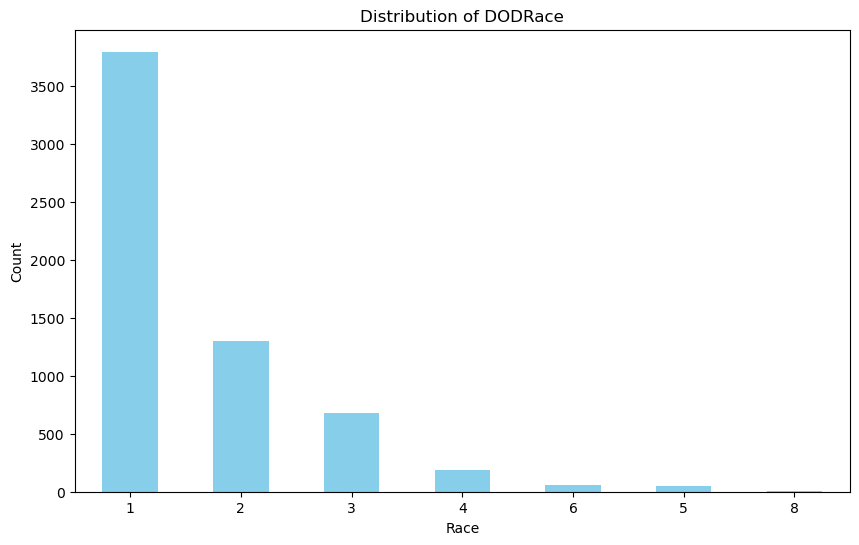

In [8]:
race_counts = new_df["DODRace"].value_counts()

print("Hope")
print("Race_counts:")
print(race_counts)
plt.figure(figsize=(10, 6))
race_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Race")
plt.ylabel("Count")
plt.title("Distribution of DODRace")
plt.xticks(rotation=0)
plt.show();


In [9]:
df_female.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [10]:
# Male
df_male.shape

(4082, 108)

In [11]:
# Female
df_female.shape

(1986, 108)

In [12]:
# After mixing the columns `Male` > `Female`.
new_df.shape

(6068, 109)

In [13]:
new_df.isna().sum()

SubjectId                         4082
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

### Results for missing values from data
we need to drop Ethnicity becouse it's has 76% missing value ( 4647/ of 6068 = 76% of total )

- Ethnicity                         : 4647

*It may indicate data collection issues, errors,noise or limitations in the dataset.

---
In `SubjectID` we have missing values because when we ingest the data (male + female) the index can't define each axis 4082 != 1986 .
 
- SubjectId                          : 4082
- subjectid                         : 1986

we can drop `SubjectID` because there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions

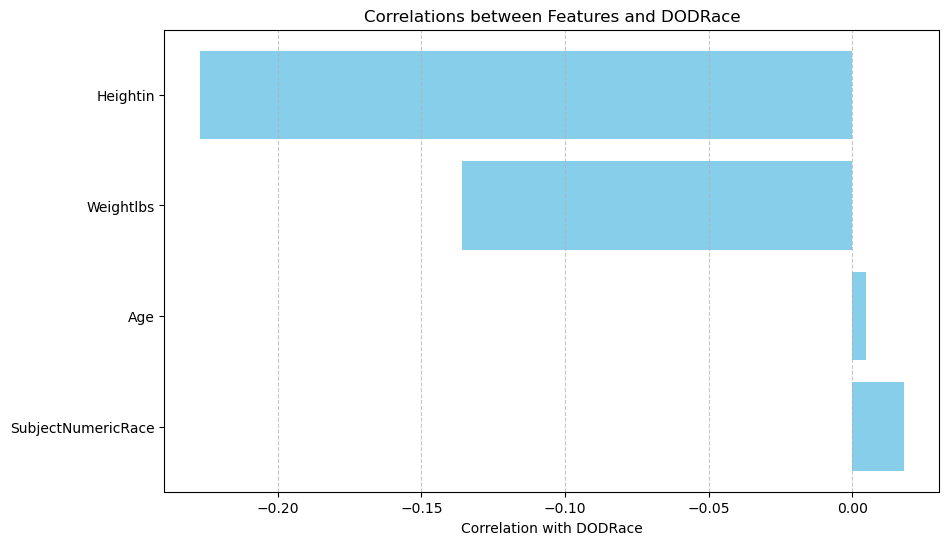

In [14]:
features_to_check = ["Age",  "Weightlbs", "SubjectNumericRace",  "Heightin",] 

correlations = {}  

for feature in features_to_check:
    correlation = new_df[feature].corr(new_df["DODRace"])
    correlations[feature] = correlation


sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)


feature_names, feature_correlations = zip(*sorted_correlations)
    
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_correlations, color='skyblue')
plt.xlabel('Correlation with DODRace')
plt.title('Correlations between Features and DODRace')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [15]:
feature_list = [
    "abdominalextensiondepthsitting",
    "acromialheight",
    "acromionradialelength",
    "anklecircumference",
    "axillaheight",
    "balloffootcircumference",
    "balloffootlength",
    "biacromialbreadth",
    "bicepscircumferenceflexed",
    "bicristalbreadth",
    "bideltoidbreadth",
    "bimalleolarbreadth",
    "bitragionchinarc",
    "bitragionsubmandibulararc",
    "bizygomaticbreadth",
    "buttockcircumference",
    "buttockdepth",
    "buttockheight",
    "buttockkneelength",
    "buttockpopliteallength",
    "calfcircumference",
    "cervicaleheight",
    "chestbreadth",
    "chestcircumference",
    "chestdepth",
    "chestheight",
    "crotchheight",
    "crotchlengthomphalion",
    "crotchlengthposterioromphalion",
    "earbreadth",
    "earlength",
    "earprotrusion",
    "elbowrestheight",
    "eyeheightsitting",
    "footbreadthhorizontal",
    "footlength",
    "forearmcenterofgriplength",
    "forearmcircumferenceflexed",
    "forearmforearmbreadth",
    "forearmhandlength",
    "functionalleglength",
    "handbreadth",
    "handcircumference",
    "handlength",
    "headbreadth",
    "headcircumference",
    "headlength",
    "heelanklecircumference",
    "heelbreadth",
    "hipbreadth",
    "hipbreadthsitting",
    "iliocristaleheight",
    "interpupillarybreadth",
    "interscyei",
    "interscyeii",
    "kneeheightmidpatella",
    "kneeheightsitting",
    "lateralfemoralepicondyleheight",
    "lateralmalleolusheight",
    "lowerthighcircumference",
    "mentonsellionlength",
    "neckcircumference",
    "neckcircumferencebase",
    "overheadfingertipreachsitting",
    "palmlength",
    "poplitealheight",
    "radialestylionlength",
    "shouldercircumference",
    "shoulderelbowlength",
    "shoulderlength",
    "sittingheight",
    "sleevelengthspinewrist",
    "sleeveoutseam",
    "span",
    "stature",
    "suprasternaleheight",
    "tenthribheight",
    "thighcircumference",
    "thighclearance",
    "thumbtipreach",
    "tibialheight",
    "tragiontopofhead",
    "trochanterionheight",
    "verticaltrunkcircumferenceusa",
    "waistbacklength",
    "waistbreadth",
    "waistcircumference",
    "waistdepth",
    "waistfrontlengthsitting",
    "waistheightomphalion",
    "weightkg",
    "wristcircumference",
    "wristheight",
    "Gender",
    "SubjectsBirthLocation",
    "Age",
    "DODRace"
] 

In [16]:
new_df = pd.concat([df_male, df_female], axis=0, ignore_index=True)

In [17]:
# Encoding with mapping dictonary
new_df["Gender"] =new_df["Gender"].map({"Female":0,"Male":1})
new_df["Gender"]

0       1
1       1
2       1
3       1
4       1
       ..
6063    0
6064    0
6065    0
6066    0
6067    0
Name: Gender, Length: 6068, dtype: int64

In [18]:
new_df[["Gender","DODRace"]].corr()["DODRace"].sort_values(ascending=False)

DODRace    1.000000
Gender    -0.118576
Name: DODRace, dtype: float64

> calculates and prints the correlateion between the "DODRace" and the rest of columns 👇

In [19]:
numeric_columns = new_df.select_dtypes(include=["number"])

correlations = {}  # A dictionary to store feature names and their correlations

for feature_list  in numeric_columns:
    correlation = new_df[feature_list].corr(new_df["DODRace"])
    correlations[feature_list] = correlation


sorted_correlations = sorted(correlations.items(), key=lambda x: x[1], reverse=True)


for feature_list , correlation in sorted_correlations:
    print(f"{feature_list }: {correlation}")

DODRace: 1.0
interpupillarybreadth: 0.14001693119916328
bizygomaticbreadth: 0.1007924256680198
heelbreadth: 0.07678602939654029
headbreadth: 0.05598661731974981
bitragionchinarc: 0.047682886795304885
subjectid: 0.021578055136335785
SubjectNumericRace: 0.017987446186759636
Age: 0.004738369085571893
bitragionsubmandibulararc: -0.020003598018330366
tragiontopofhead: -0.021190996821145457
earprotrusion: -0.029490038880421482
lowerthighcircumference: -0.037853050376427055
thighcircumference: -0.04269311041965317
earlength: -0.042940446473216584
mentonsellionlength: -0.044308422273943396
footbreadthhorizontal: -0.05326007675725466
headcircumference: -0.05422106411708435
thighclearance: -0.060195616127848524
buttockdepth: -0.06385418607852715
hipbreadthsitting: -0.06528652655864114
bicepscircumferenceflexed: -0.06658659773654699
palmlength: -0.07441426058350821
chestdepth: -0.07765498412022596
shoulderlength: -0.07883032444716735
earbreadth: -0.07908947122840257
abdominalextensiondepthsitting

In [20]:
new_df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [21]:
race_mapping = {
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native Amrican",
    6: "Pacific Islander",
    8: "Other",
}
new_df["DODRace"] = new_df["DODRace"].replace(race_mapping)

In [22]:
new_df["DODRace"].value_counts()

DODRace
White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native Amrican        49
Other                  3
Name: count, dtype: int64

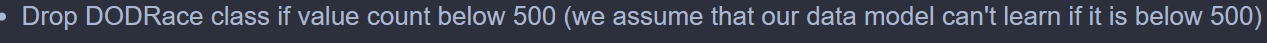
### Values liss than 500>n
- Asian                188
- Pacific Islander      59
- Native Amrican        49
- Other                  3

### Drop unnecessary colums when exploring the "DATA DICT"  and the correlateion
- Date:
 there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions 

- Subjectid: to columns in male and female ID's 
    + so many none value.
      +subjectid:
        +SubjectId:
    there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
    
 - WritingPreference:
   there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
   
 - Weightlbs:
   there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
 - Branch:
   there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
 - Component:
   there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
 - Installation:
   there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
 - SubjectNumericRace:
    there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
 - PrimaryMOS:
    there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
 - Heightin:
    there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
  - Ethnicity:
    there is no relation with Department of Defense Race (DODRace), no importance in CLS or regressions
     + so many none value.

In [23]:
# Droping unnecessary features and check the DF:
print(f"The  DataFrame BEFORE dropping unnecessary features: rows are {new_df.shape[0]} and columns are {new_df.shape[1]}")
# This variable is intended ["DODRace"] 
value_to_drop = ["Asian",
"Pacific Islander",
"Native Amrican",
"Other"]
new_df = new_df[~new_df["DODRace"].isin(value_to_drop)]
columns_to_drop =["Date", "subjectid", "Weightlbs","Ethnicity","Installation", "SubjectNumericRace", "PrimaryMOS", "Heightin"
]
new_df.drop(columns = columns_to_drop, inplace=True)
print(f"The  DataFrame AFTER dropping unnecessary features: rows are {new_df.shape[0]} and columns are {new_df.shape[1]}")

The  DataFrame BEFORE dropping unnecessary features: rows are 6068 and columns are 108
The  DataFrame AFTER dropping unnecessary features: rows are 5769 and columns are 100


In [24]:
new_df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

In [25]:
new_df["DODRace"].value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [26]:
drop_DODRace = new_df.DODRace.value_counts()[new_df.DODRace.value_counts() <= 500].index
drop_DODRace

Index([], dtype='object', name='DODRace')

In [27]:
for i in drop_DODRace:
    drop_index = new_df[new_df['DODRace'] == i].index
    new_df.drop(index = drop_index, inplace=True)

new_df.reset_index(drop=True, inplace=True)
new_df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                                266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                                233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                                287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                                234            1347                    31

In [28]:
for col in new_df:
    print(f"{col:<30}:", new_df[col].nunique())

abdominalextensiondepthsitting: 218
acromialheight                : 425
acromionradialelength         : 129
anklecircumference            : 110
axillaheight                  : 396
balloffootcircumference       : 107
balloffootlength              : 84
biacromialbreadth             : 167
bicepscircumferenceflexed     : 236
bicristalbreadth              : 132
bideltoidbreadth              : 239
bimalleolarbreadth            : 37
bitragionchinarc              : 107
bitragionsubmandibulararc     : 124
bizygomaticbreadth            : 48
buttockcircumference          : 426
buttockdepth                  : 159
buttockheight                 : 315
buttockkneelength             : 204
buttockpopliteallength        : 176
calfcircumference             : 195
cervicaleheight               : 445
chestbreadth                  : 131
chestcircumference            : 520
chestdepth                    : 160
chestheight                   : 415
crotchheight                  : 308
crotchlengthomphalion         :

In [29]:
# zero NaN values:
new_df.isna().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [30]:
new_df.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null  

In [31]:
new_df.describe(include=['object']).T

count unique                     top  freq
Component              5769      3            Regular Army  2955
Branch                 5769      3  Combat Service Support  3021
SubjectsBirthLocation  5769    136              California   417
DODRace                5769      3                   White  3792
WritingPreference      5769      3              Right hand  5088

In [32]:
# For the SubjectsBirthLocation we will map all the states into one value assuming that the state doesn't really show an important information

my_list =  new_df['SubjectsBirthLocation'].unique()
result = ", ".join(my_list)
print(result)

North Dakota, New York, Wisconsin, North Carolina, Kentucky, Mississippi, Romania, Arkansas, Maryland, Arizona, South Carolina, California, Washington, Virginia, Texas, Illinois, Puerto Rico, Georgia, Colombia, El Salvador, Michigan, Missouri, Philippines, Florida, Pennsylvania, West Virginia, Nebraska, Indiana, Montana, Colorado, Mexico, Minnesota, Iowa, Peru, Oklahoma, Massachusetts, District of Columbia, Ohio, Louisiana, Oregon, Tennessee, Alaska, Connecticut, Guam, Netherlands, Idaho, New Mexico, Belgium, Maine, New Jersey, Morocco, Alabama, Canada, Germany, Hawaii, Kansas, British Virgin Islands, Utah, US Virgin Islands, Nevada, Delaware, Jamaica, Cameroon, New Hampshire, Nicaragua, United Kingdom, Ukraine, Sierra Leone, Cuba, Rhode Island, Dominican Republic, Nigeria, Barbados, Costa Rica, Guyana, Vermont, Wyoming, Bahamas, Portugal, Ecuador, France, Sudan, Belize, Guadalupe, South Dakota, Senegal, Haiti, Brazil, Cape Verde, Syria, Liberia, South Africa, Russia, Trinidad and Toba

I used the (Solutions Project) code to avoid delays in delivering the project and apply what we learned as much as possible 🔓 (Start)

In [33]:


states_by_region = {
    "Alabama": "South",
    "Alaska": "West",
    "Arizona": "West",
    "Arkansas": "South",
    "California": "West",
    "Colorado": "West",
    "Connecticut": "Northeast",
    "Delaware": "Mid Atlantic",
    "Florida": "South",
    "Georgia": "South",
    "Hawaii": "West",
    "Idaho": "West",
    "Illinois": "Midwest",
    "Indiana": "Midwest",
    "Iowa": "Midwest",
    "Kansas": "Midwest",
    "Kentucky": "South",
    "Louisiana": "South",
    "Maine": "Northeast",
    "Maryland": "Mid Atlantic",
    "Massachusetts": "Northeast",
    "Michigan": "Midwest",
    "Minnesota": "Midwest",
    "Mississippi": "South",
    "Missouri": "Midwest",
    "Montana": "West",
    "Nebraska": "Midwest",
    "Nevada": "West",
    "New Hampshire": "Northeast",
    "New Jersey": "Mid Atlantic",
    "New Mexico": "West",
    "New York": "Northeast",
    "North Carolina": "South",
    "North Dakota": "Midwest",
    "Ohio": "Midwest",
    "Oklahoma": "South",
    "Oregon": "West",
    "Pennsylvania": "Mid Atlantic",
    "Rhode Island": "Northeast",
    "South Carolina": "South",
    "South Dakota": "Midwest",
    "Tennessee": "South",
    "Texas": "South",
    "Utah": "West",
    "Vermont": "Northeast",
    "Virginia": "Mid Atlantic",
    "Washington": "West",
    "West Virginia": "South",
    "Wisconsin": "Midwest",
    "Wyoming": "West",
    "District of Columbia": "Mid Atlantic"
}


In [34]:
countries_by_continent = {
    "Afghanistan": "Asia",
    "Albania": "Europe",
    "Algeria": "Africa",
    "American Samoa": "Oceania",
    "Andorra": "Europe",
    "Angola": "Africa",
    "Antigua and Barbuda": "North America",
    "Argentina": "South America",
    "Armenia": "Asia",
    "Australia": "Oceania",
    "Austria": "Europe",
    "Azerbaijan": "Asia",
    "Bahamas": "North America",
    "Bahrain": "Asia",
    "Bangladesh": "Asia",
    "Barbados": "North America",
    "Belarus": "Europe",
    "Belgium": "Europe",
    "Belize": "North America",
    "Benin": "Africa",
    "Bhutan": "Asia",
    "Bolivia": "South America",
    "Bosnia and Herzegovina": "Europe",
    "Botswana": "Africa",
    "Brazil": "South America",
    "British Virgin Islands": "North America",
    "Brunei": "Asia",
    "Bulgaria": "Europe",
    "Burkina Faso": "Africa",
    "Burundi": "Africa",
    "Cambodia": "Asia",
    "Cameroon": "Africa",
    "Canada": "North America",
    "Cape Verde": "Africa",
    "Central African Republic": "Africa",
    "Chad": "Africa",
    "Chile": "South America",
    "China": "Asia",
    "Colombia": "South America",
    "Comoros": "Africa",
    "Congo, Democratic Republic of the": "Africa",
    "Congo, Republic of the": "Africa",
    "Costa Rica": "North America",
    "Côte d'Ivoire": "Africa",
    "Croatia": "Europe",
    "Cuba": "North America",
    "Cyprus": "Europe",
    "Czech Republic": "Europe",
    "Denmark": "Europe",
    "Djibouti": "Africa",
    "Dominica": "North America",
    "Dominican Republic": "North America",
    "East Timor": "Asia",
    "Ecuador": "South America",
    "Egypt": "Africa",
    "El Salvador": "North America",
    "England": "Europe",
    "Equatorial Guinea": "Africa",
    "Eritrea": "Africa",
    "Estonia": "Europe",
    "Eswatini": "Africa",
    "Ethiopia": "Africa",
    "Federated States of Micronesia": "Oceania",
    "Fiji": "Oceania",
    "Finland": "Europe",
    "France": "Europe",
    "French Guiana": "South America",
    "Gabon": "Africa",
    "Gambia": "Africa",
    "Georgia": "Asia",
    "Germany": "Europe",
    "Ghana": "Africa",
    "Greece": "Europe",
    "Grenada": "North America",
    "Guam": "Oceania",
    "Guadalupe" : "North America",
    "Guatemala": "North America",
    "Guinea": "Africa",
    "Guinea-Bissau": "Africa",
    "Guyana": "South America",
    "Haiti": "North America",
    "Honduras": "North America",
    "Hungary": "Europe",
    "Iceland": "Europe",
    "India": "Asia",
    "Indonesia": "Asia",
    "Iran": "Asia",
    "Iraq": "Asia",
    "Ireland": "Europe",
    "Israel": "Asia",
    "Italy": "Europe",
    "Ivory Coast": "Africa",
    "Jamaica": "North America",
    "Japan": "Asia",
    "Jordan": "Asia",
    "Kazakhstan": "Asia",
    "Kenya": "Africa",
    "Kiribati": "Oceania",
    "Kosovo": "Europe",
    "Kuwait": "Asia",
    "Kyrgyzstan": "Asia",
    "Laos": "Asia",
    "Latvia": "Europe",
    "Lebanon": "Asia",
    "Lesotho": "Africa",
    "Liberia": "Africa",
    "Libya": "Africa",
    "Liechtenstein": "Europe",
    "Lithuania": "Europe",
    "Luxembourg": "Europe",
    "Macedonia, Republic of": "Europe",
    "Madagascar": "Africa",
    "Malawi": "Africa",
    "Malaysia": "Asia",
    "Maldives": "Asia",
    "Mali": "Africa",
    "Malta": "Europe",
    "Marshall Islands": "Oceania",
    "Mauritania": "Africa",
    "Mauritius": "Africa",
    "Mexico": "North America",
    "Micronesia": "Oceania",
    "Moldova": "Europe",
    "Monaco": "Europe",
    "Mongolia": "Asia",
    "Montenegro": "Europe",
    "Morocco": "Africa",
    "Mozambique": "Africa",
    "Myanmar (Burma)": "Asia",
    "Namibia": "Africa",
    "Nauru": "Oceania",
    "Nepal": "Asia",
    "Netherlands": "Europe",
    "New Zealand": "Oceania",
    "Nicaragua": "North America",
    "Niger": "Africa",
    "Nigeria": "Africa",
    "North Korea": "Asia",
    "Norway": "Europe",
    "Oman": "Asia",
    "Pakistan": "Asia",
    "Palau": "Oceania",
    "Palestine": "Asia",
    "Panama": "North America",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Peru": "South America",
    "Philippines": "Asia",
    "Poland": "Europe",
    "Portugal": "Europe",
    "Puerto Rico": "North America",
    "Qatar": "Asia",
    "Romania": "Europe",
    "Russia": "Europe",
    "Rwanda": "Africa",
    "Saint Kitts and Nevis": "North America",
    "Saint Lucia": "North America",
    "Saint Vincent and the Grenadines": "North America",
    "Samoa": "Oceania",
    "San Marino": "Europe",
    "Sao Tome and Principe": "Africa",
    "Saudi Arabia": "Asia",
    "Scotland": "Europe",
    "Senegal": "Africa",
    "Serbia": "Europe",
    "Seychelles": "Africa",
    "Sierra Leone": "Africa",
    "Singapore": "Asia",
    "Slovakia": "Europe",
    "Slovenia": "Europe",
    "Solomon Islands": "Oceania",
    "Somalia": "Africa",
    "South Africa": "Africa",
    "South Korea": "Asia",
    "South Sudan": "Africa",
    "Spain": "Europe",
    "Sri Lanka": "Asia",
    "Sudan": "Africa",
    "Suriname": "South America",
    "Swaziland": "Africa",
    "Sweden": "Europe",
    "Switzerland": "Europe",
    "Syria": "Asia",
    "Taiwan": "Asia",
    "Tajikistan": "Asia",
    "Tanzania": "Africa",
    "Thailand": "Asia",
    "Togo": "Africa",
    "Tonga": "Oceania",
    "Trinidad and Tobago": "North America",
    "Tunisia": "Africa",
    "Turkey": "Europe",
    "Turkmenistan": "Asia",
    "Tuvalu": "Oceania",
    "Uganda": "Africa",
    "Ukraine": "Europe",
    "United Arab Emirates": "Asia",
    "United Kingdom": "Europe",
    "United States": "North America",
    "Uruguay": "South America",
    "US Virgin Islands": "North America",
    "Uzbekistan": "Asia",
    "Vanuatu": "Oceania",
    "Vatican City": "Europe",
    "Venezuela": "South America",
    "Vietnam": "Asia",
    "Wales": "Europe",
    "Yemen": "Asia",
    "Zambia": "Africa",
    "Zimbabwe": "Africa",
    "South America": "South America",
    "Burma": "Asia",
    "Korea": "Asia",
    "Northern Mariana Islands": "Oceania",
    "Bermuda": "North America",
}

In [35]:
new_df["SubjectsBirthLocation"] = [i if i in states_by_region else countries_by_continent[i] for i in new_df["SubjectsBirthLocation"].values ]
new_df["SubjectsBirthLocation"].value_counts()

SubjectsBirthLocation
California              417
New York                411
Texas                   386
North America           264
Indiana                 264
Florida                 210
Illinois                210
Oklahoma                205
Minnesota               194
Michigan                194
Mississippi             193
Georgia                 168
Alabama                 164
South Carolina          161
Europe                  146
North Carolina          145
Ohio                    139
Louisiana               136
Pennsylvania            130
Virginia                113
Massachusetts           109
Wisconsin                99
New Jersey               88
Missouri                 83
Maryland                 78
Colorado                 78
Arizona                  75
Tennessee                74
Kentucky                 67
Kansas                   62
Washington               61
Iowa                     55
South Dakota             53
Arkansas                 53
South America            4

In [36]:
new_df.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace 
Army National Guard  Combat Arms             White       0.802835
                                             Black       0.101804
                                             Hispanic    0.095361
                     Combat Service Support  White       0.668855
                                             Black       0.227571
                                             Hispanic    0.103574
                     Combat Support          White       0.684783
                                             Black       0.234783
                                             Hispanic    0.080435
Army Reserve         Combat Arms             White       0.833333
                                             Hispanic    0.166667
                     Combat Service Support  White       0.602941
                                             Hispanic    0.220588
                                             Black       0.176471
                     C

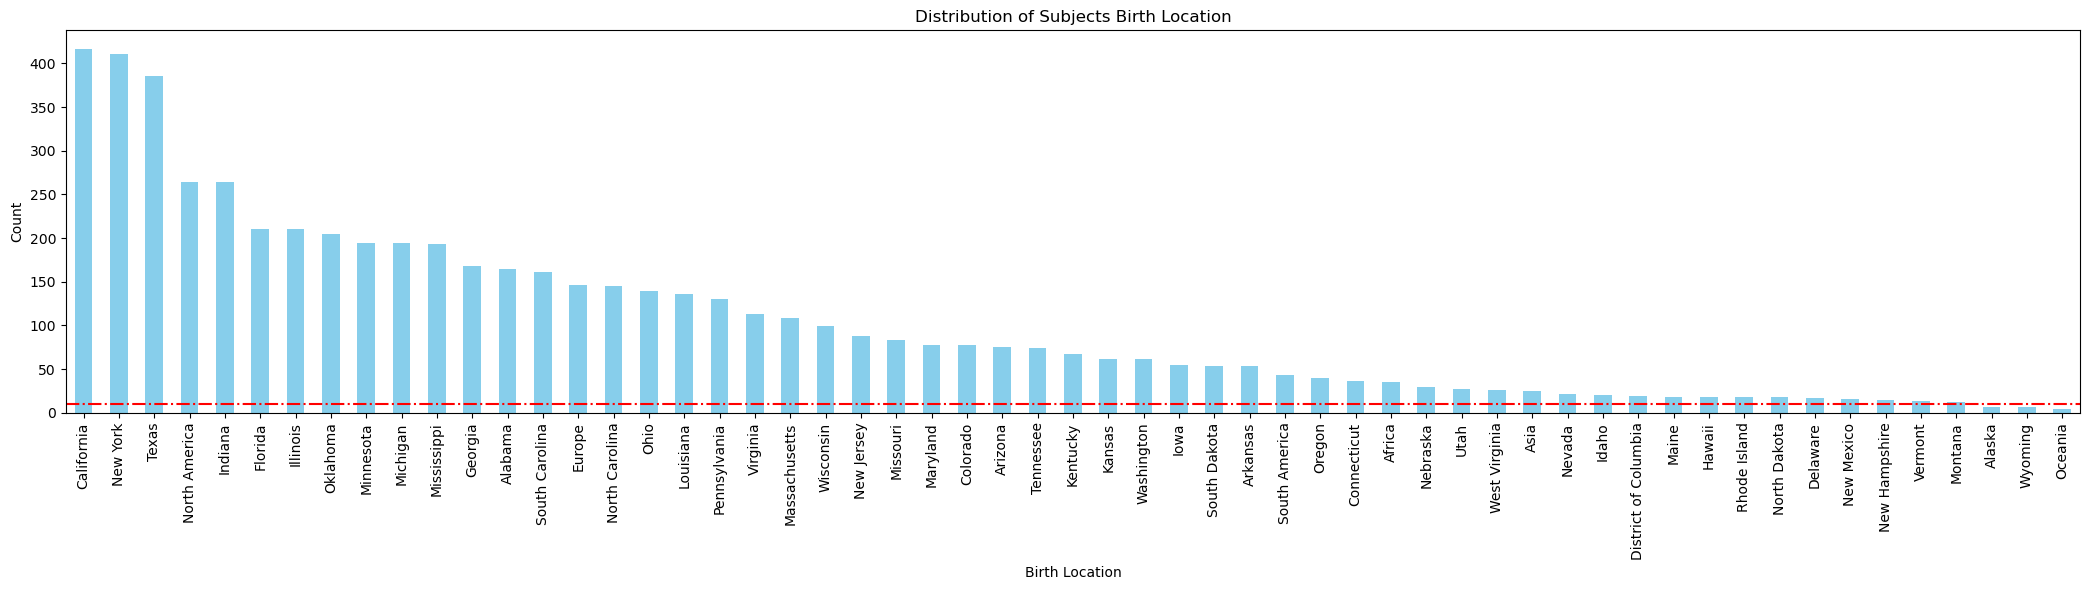

In [37]:
# I took this code from (Solution Project) and modified it.

birth_location_counts = new_df["SubjectsBirthLocation"].value_counts()
plt.figure(figsize=(21,6))
birth_location_counts.plot(kind="bar", color="skyblue")
plt.title("Distribution of Subjects Birth Location")
plt.xlabel("Birth Location")
plt.ylabel("Count")

plt.axhline(10, color='red', linestyle="dashdot")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [38]:
new_df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace 
Army National Guard  White       0.711546
                     Black       0.191408
                     Hispanic    0.097046
Army Reserve         White       0.550725
                     Black       0.251208
                     Hispanic    0.198068
Regular Army         White       0.616920
                     Black       0.252792
                     Hispanic    0.130288
Name: proportion, dtype: float64

In [39]:
ct = pd.crosstab( new_df.DODRace, [new_df.Component, new_df.Branch],  margins=True, margins_name="Total", normalize='columns')
ct

Component Army National Guard                                       Army Reserve                                       Regular Army                                           Total
Branch            Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support  Combat Arms Combat Service Support Combat Support          
DODRace                                                                                                                                                                            
Black                0.101804               0.227571       0.234783     0.000000               0.176471       0.430769     0.129477               0.270145       0.341259  0.224996
Hispanic             0.095361               0.103574       0.080435     0.166667               0.220588       0.153846     0.157025               0.127477       0.109091  0.117698
White                0.802835               0.668855       0.684783     0.833333               0.602941       0.415385     0.713499               0.602378       0.549650  0.657306

In [40]:
new_df.shape

(5769, 100)

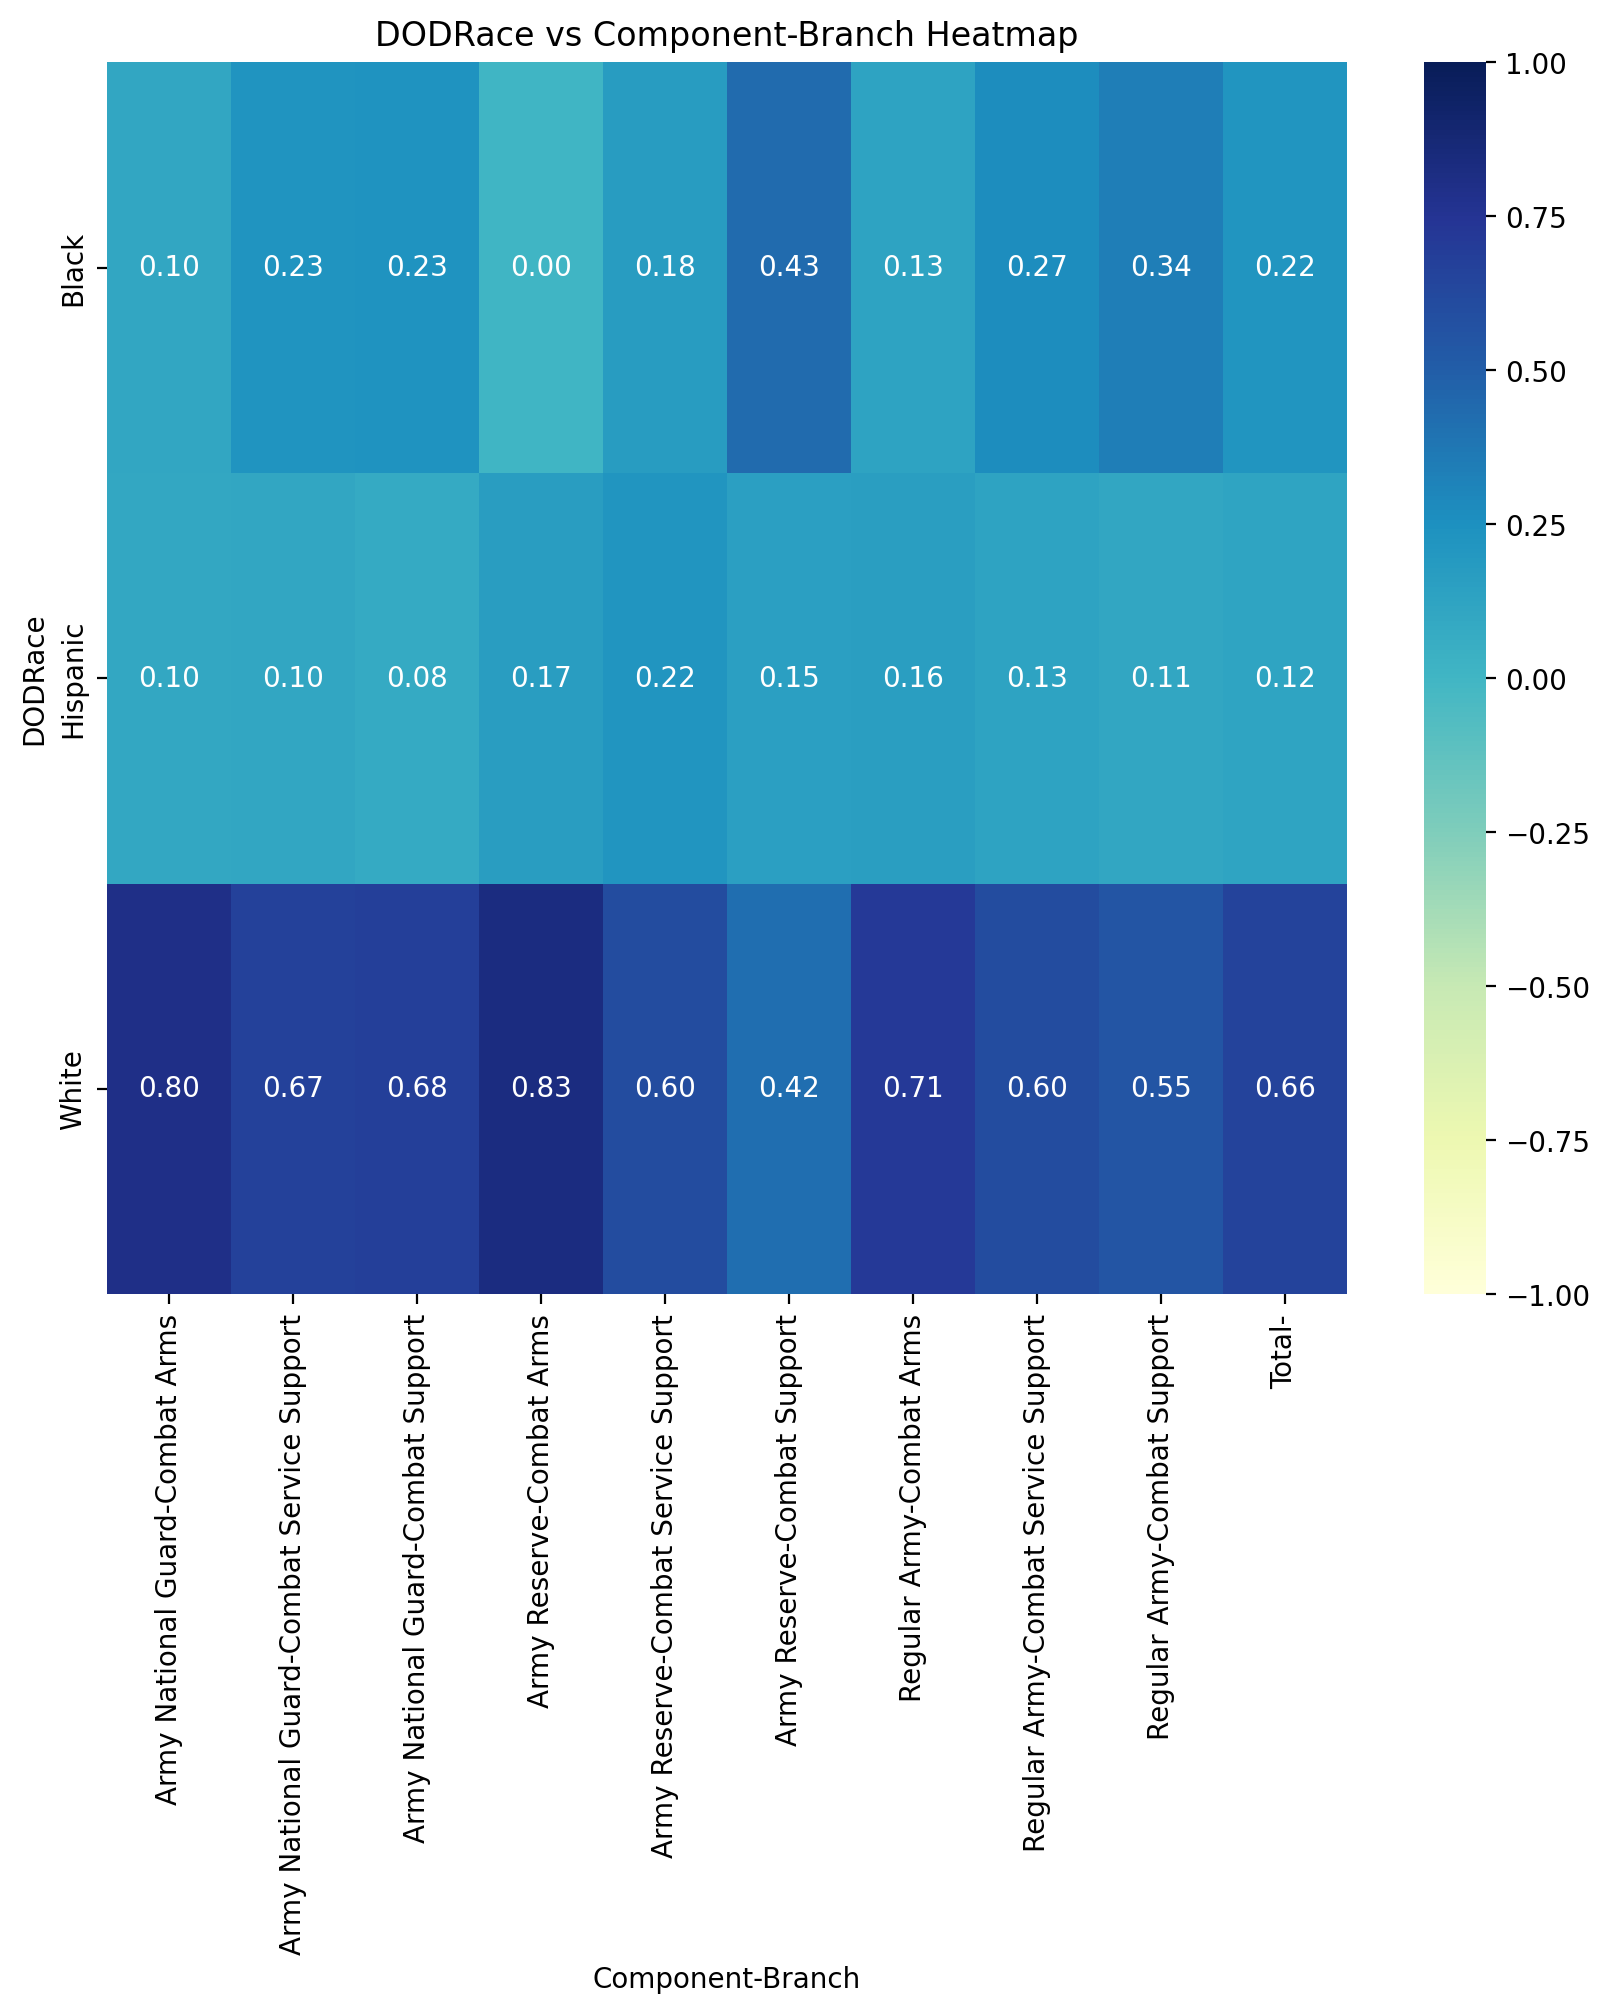

In [41]:
min_corr = -1.0
max_corr = 1.0

plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(ct, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, vmin=min_corr, vmax=max_corr)
plt.title('DODRace vs Component-Branch Heatmap')
plt.show()

In [42]:
new_df.head()


abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

In [43]:
new_df['SubjectsBirthLocation'].describe(include=['object'], exclude=['int64']).T

count           5769
unique            57
top       California
freq             417
Name: SubjectsBirthLocation, dtype: object

In [44]:
new_df['DODRace'].describe(include=['object'], exclude=['int64']).T

count      5769
unique        3
top       White
freq       3792
Name: DODRace, dtype: object

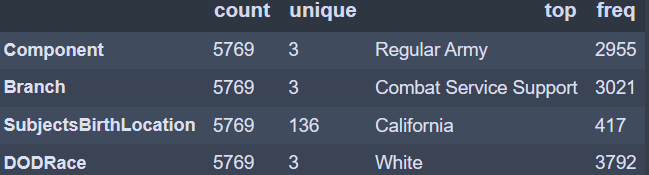

In [45]:
# After we extracted and analyzed the usefulness of the subcategories,
# we left only the columns that give a more detailed description of the data
columns_to_drop =["Component", "Branch"]
new_df.drop(columns = columns_to_drop, inplace=True)

In [46]:
new_df.describe(include=['object']).T

count unique         top  freq
SubjectsBirthLocation  5769     57  California   417
DODRace                5769      3       White  3792
WritingPreference      5769      3  Right hand  5088

In [47]:
new_df.shape

(5769, 98)

In [48]:
new_df.DODRace.value_counts()

DODRace
White       3792
Black       1298
Hispanic     679
Name: count, dtype: int64

In [49]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

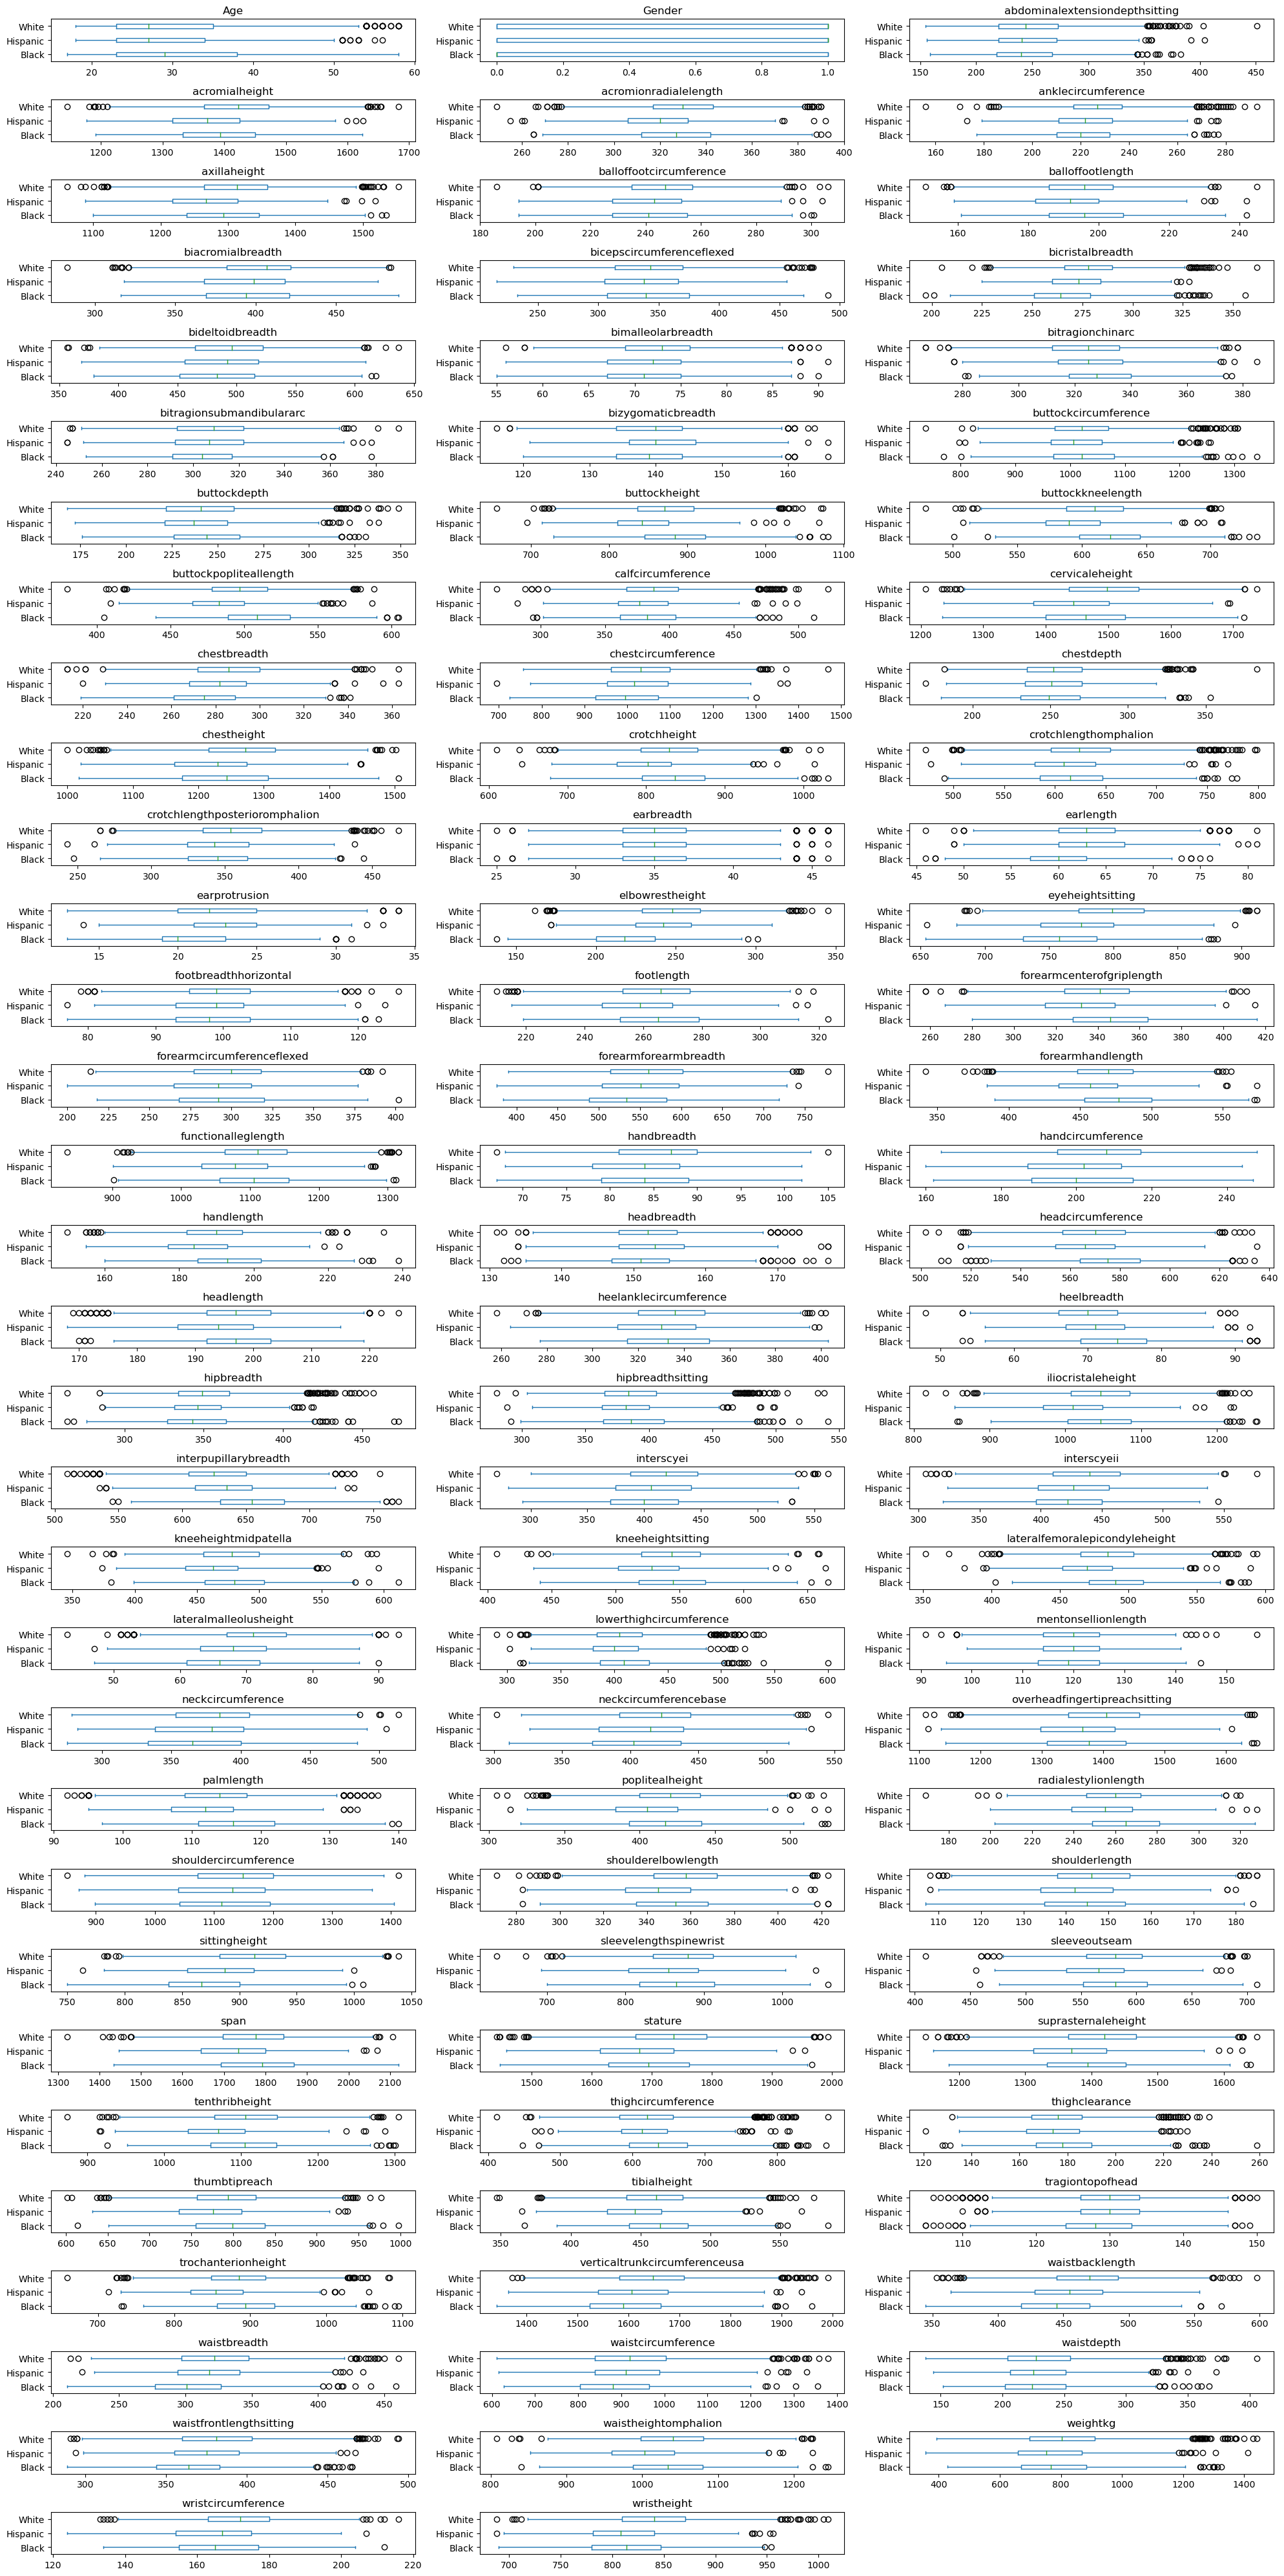

In [52]:
# Check the outliers 
new_df.plot(by ='DODRace', kind="box", subplots=True, layout=(32, 3), figsize=(20, 40), vert=False, sharex=False, sharey=False)
plt.tight_layout();

In [53]:
new_df.info(max_cols=100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5769 entries, 0 to 5768
Data columns (total 98 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   abdominalextensiondepthsitting  5769 non-null   int64 
 1   acromialheight                  5769 non-null   int64 
 2   acromionradialelength           5769 non-null   int64 
 3   anklecircumference              5769 non-null   int64 
 4   axillaheight                    5769 non-null   int64 
 5   balloffootcircumference         5769 non-null   int64 
 6   balloffootlength                5769 non-null   int64 
 7   biacromialbreadth               5769 non-null   int64 
 8   bicepscircumferenceflexed       5769 non-null   int64 
 9   bicristalbreadth                5769 non-null   int64 
 10  bideltoidbreadth                5769 non-null   int64 
 11  bimalleolarbreadth              5769 non-null   int64 
 12  bitragionchinarc                5769 non-null   

In [54]:
new_df.describe(include=['object']).T

count unique         top  freq
SubjectsBirthLocation  5769     57  California   417
DODRace                5769      3       White  3792
WritingPreference      5769      3  Right hand  5088

In [55]:
pd.set_option('display.max_rows', None)
new_df.select_dtypes(include='object')

SubjectsBirthLocation   DODRace            WritingPreference
0             North Dakota     White                   Right hand
1                 New York     White                    Left hand
2                 New York     Black                    Left hand
3                Wisconsin     White                   Right hand
4           North Carolina     Black                   Right hand
5                 Kentucky     White                   Right hand
6              Mississippi     Black                   Right hand
7                   Europe     White                   Right hand
8                 Arkansas     White                   Right hand
9                 Maryland     White                    Left hand
10                 Arizona     White                   Right hand
11                New York     White  Either hand (No preference)
12          South Carolina     Black                   Right hand
13              California     White                   Right hand
14              Washington     White                   Right hand
15                Virginia     Black                   Right hand
16                Kentucky     White                   Right hand
17                   Texas     White                   Right hand
18                Maryland     White                   Right hand
19                Illinois     White                   Right hand
20                   Texas     White                   Right hand
21           North America  Hispanic                   Right hand
22                   Texas     White                   Right hand
23                 Georgia     Black                   Right hand
24                   Texas     White                   Right hand
25           South America  Hispanic                   Right hand
26                New York     White                    Left hand
27              California     White                   Right hand
28                New York  Hispanic                   Right hand
29                Illinois     White                   Right hand
30              California     White                   Right hand
31           North America  Hispanic                    Left hand
32           North America  Hispanic                   Right hand
33                Michigan     White                   Right hand
34                Missouri     White                   Right hand
35               Wisconsin     White                   Right hand
36                    Asia     White                    Left hand
37               Wisconsin     White                   Right hand
38                 Florida     Black                   Right hand
39                   Texas     White                   Right hand
40                   Texas     White                   Right hand
41                   Texas  Hispanic                   Right hand
42                 Georgia     White                   Right hand
43              California  Hispanic                   Right hand
44            Pennsylvania     White                   Right hand
45            Pennsylvania     White                   Right hand
46           West Virginia     White                   Right hand
47                Nebraska     White                   Right hand
48                Michigan     White                   Right hand
49                Illinois     White                   Right hand
50          North Carolina     White                   Right hand
51                 Indiana     White                   Right hand
52                   Texas     White                   Right hand
53                 Arizona     White                   Right hand
54             Mississippi     White                   Right hand
55                Maryland     Black                   Right hand
56                 Georgia     White                    Left hand
57              California     White                   Right hand
58                 Montana     White                   Right hand
59           West Virginia     White         

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [56]:
X = new_df.drop(columns=["DODRace"])
y = new_df.DODRace

In [57]:
from sklearn.model_selection import train_test_split
np.random.seed = (97) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# By setting (stratify=y), we ensure that the class distribution of the target variable y is maintained in both the training and testing sets.

In [58]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


In [59]:
new_df.head()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
0                             266            1467                    337                 222          1347                      253               202                401                        369               274               493                  71               319                        291                 142                   979           240            882                619                     509                373             1535           291                1074         259         1292           877                    607                             351          36         71             19              247               802                    101         273                        349                         299                    575                477                 1136           90                214         193          150                583         206                     326           70         332                366                1071   
1                             233            1395                    326                 220          1293                      245               193                394                        338               257               479                  67               344                        320                 135                   944           232            870                584                     468                357             1471           269                1021         253         1244           851                    615                             376          33         62             18              232               781                     98         263                        348                         289                    523                476                 1096           86                203         195          146                568         201                     334           72         312                356                1046   
2                             287            1430                    341                 230          1327                      256               196                427                        408               261               544                  75               345                        330                 135                  1054           258            901                623                     506                412             1501           288                1120         267         1288           854                    636                             359          40         61             23              237               810                    103         270                        355                         357                    575                491                 1115           93                220         203          148                573         202                     356           70         349                393                1053   
3                             234            1347                    310           

In [60]:
# print('''
# Shape of X train is  : {}
# Shape of Y train is  : {}
# Shape of X test is  : {}
# Shape of Y test is  : {}
# '''.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [83]:
!pip install --upgrade scikit-learn

In [84]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [85]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [88]:
U = X_train.select_dtypes("object").columns
U

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [89]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=97))]
pipe_log_model = Pipeline(steps=operations)

In [90]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), U),
    remainder=MinMaxScaler(),
    verbose_feature_names_out=False,
)

In [91]:

np.random.seed = (97)
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000),
    ),
]

pipe_log_model = Pipeline(steps=operations)

In [92]:
pipe_log_model.fit(X_train, y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)


Test_Set
[[239  12   9]
 [  9 112  15]
 [ 25  95 638]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 949   57   32]
 [  25  444   74]
 [  61  364 2609]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.51      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.86      0.82      4615
weighted avg       0.90      0.87      0.88      4615



In [93]:
scoring = {
    "precision_Hispanic": make_scorer(
        precision_score, average=None, labels=["Hispanic"]
    ),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=["Hispanic"]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=["Hispanic"]),
}

In [94]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=97),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.497190
train_precision_Hispanic    0.521373
test_recall_Hispanic        0.780842
train_recall_Hispanic       0.818091
test_f1_Hispanic            0.606196
train_f1_Hispanic           0.636852
dtype: float64

# Conclution

### Logistic Model GridsearchCV

In [95]:
from sklearn.model_selection import GridSearchCV

In [96]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=["Hispanic"])

In [104]:
# Lasso And ridge , C , solver
param_grid = { 
               "log__penalty": ["l1","l2"],
               "log__solver" : ['lbfgs','liblinear'],
              "log__C":[0.5, 1]
              
             }

In [105]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=97),
    ),
]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,param_grid,scoring=recall_Hispanic, cv=10,n_jobs=-1,return_train_score=True,)

In [106]:
log_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=97))]),
             n_jobs=-1,
             param_grid={'log__C': [0.5, 1], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['lbfgs', 'liblinear']},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [107]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=97))])

In [109]:
# grid_Logistick_pipe.best_params_

In [110]:
pd.DataFrame(log_model_grid.cv_results_).loc[
    log_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.780842
mean_train_score    0.818091
Name: 6, dtype: object

In [116]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[239  12   9]
 [  9 112  15]
 [ 25  95 638]]
              precision    recall  f1-score   support

       Black       0.88      0.92      0.90       260
    Hispanic       0.51      0.82      0.63       136
       White       0.96      0.84      0.90       758

    accuracy                           0.86      1154
   macro avg       0.78      0.86      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 949   57   32]
 [  25  444   74]
 [  61  364 2609]]
              precision    recall  f1-score   support

       Black       0.92      0.91      0.92      1038
    Hispanic       0.51      0.82      0.63       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.86      0.82      4615
weighted avg       0.90      0.87      0.88      4615



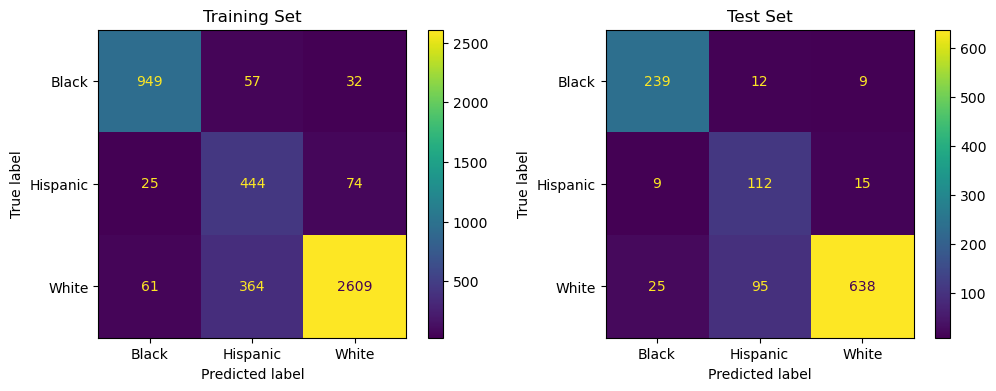

In [115]:

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(log_model_grid, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(log_model_grid, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()



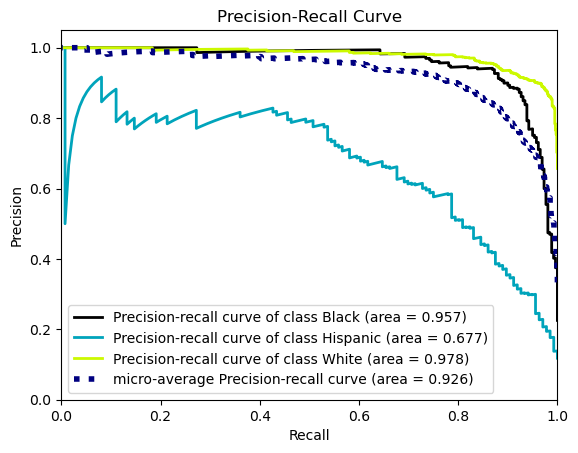

In [118]:
from scikitplot.metrics import plot_roc, plot_precision_recall

operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=97),
    ),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [119]:
from sklearn.metrics import average_precision_score
y_test_dummies = pd.get_dummies(y_test).values
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])


0.6770585933161765

In [120]:
y_pred = log_model_grid.predict(X_test)
log_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [123]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=97,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

pipe_log_model_libl = Pipeline(steps=operations)

In [122]:
pipe_log_model_libl.fit(X_train, y_train)
eval_metric(pipe_log_model_libl, X_train, y_train, X_test, y_test)

Test_Set
[[239   6  15]
 [ 10  82  44]
 [ 20  38 700]]
              precision    recall  f1-score   support

       Black       0.89      0.92      0.90       260
    Hispanic       0.65      0.60      0.63       136
       White       0.92      0.92      0.92       758

    accuracy                           0.88      1154
   macro avg       0.82      0.82      0.82      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[ 957   35   46]
 [  32  378  133]
 [  46  150 2838]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.67      0.70      0.68       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.85      0.85      0.85      4615
weighted avg       0.91      0.90      0.90      4615



In [125]:
operations = [
    ("OneHotEncoder", column_trans),
    (
        "log",
        LogisticRegression(
            class_weight="balanced",
            max_iter=10000,
            random_state=97,
            solver="liblinear",
            penalty="l1",
        ),
    ),
]

model = Pipeline(steps=operations)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.644376
train_precision_Hispanic    0.672277
test_recall_Hispanic        0.679630
train_recall_Hispanic       0.702283
test_f1_Hispanic            0.660001
train_f1_Hispanic           0.686924
dtype: float64

## 2. SVC

### Vanilla SVC model 

In [126]:
from sklearn.svm import SVC
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

In [127]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

pipe_svc_model = Pipeline(steps=operations_svc)

In [128]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[221  18  18]
 [  5 104  24]
 [ 14 147 603]]
              precision    recall  f1-score   support

       Black       0.92      0.86      0.89       257
    Hispanic       0.39      0.78      0.52       133
       White       0.93      0.79      0.86       764

    accuracy                           0.80      1154
   macro avg       0.75      0.81      0.75      1154
weighted avg       0.87      0.80      0.82      1154


Train_Set
[[ 960   45   36]
 [  22  462   62]
 [  49  419 2560]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.93      1041
    Hispanic       0.50      0.85      0.63       546
       White       0.96      0.85      0.90      3028

    accuracy                           0.86      4615
   macro avg       0.80      0.87      0.82      4615
weighted avg       0.90      0.86      0.87      4615



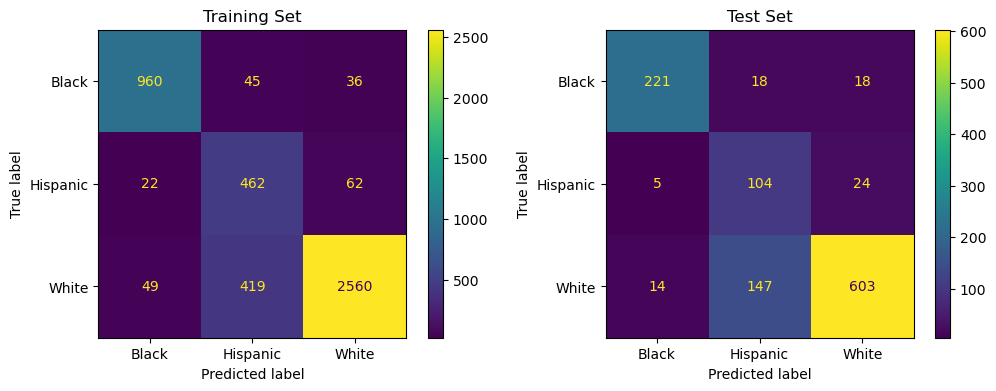

In [132]:
y_pred_svm = pipe_svc_model.predict(X_test)
y_train_pred_SVM = pipe_svc_model.predict(X_train)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

disp_train = ConfusionMatrixDisplay.from_estimator(pipe_svc_model, X_train, y_train, ax=axes[0])
disp_train.ax_.set_title('Training Set')

disp_test = ConfusionMatrixDisplay.from_estimator(pipe_svc_model, X_test, y_test, ax=axes[1])
disp_test.ax_.set_title('Test Set')

plt.show()



In [133]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=10, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_precision_Hispanic     0.457006
train_precision_Hispanic    0.497789
test_recall_Hispanic        0.776667
train_recall_Hispanic       0.842899
test_f1_Hispanic            0.574611
train_f1_Hispanic           0.625883
dtype: float64

###  SVC Model GridsearchCV

In [134]:
param_grid = {"svc__C": [0.5, 1], "svc__gamma": ["scale", "auto", 0.01]}

In [135]:
operations_svc = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(
    model,
    param_grid,
    scoring=recall_Hispanic,
    cv=10,
    n_jobs=-1,
    return_train_score=True,
)

In [136]:
svm_model_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.5, 1],
                         'svc__gamma': ['scale', 'auto', 0.01]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [137]:
svm_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('svc', SVC(C=0.5, class_weight='balanced', random_state=101))])

In [138]:
pd.DataFrame(svm_model_grid.cv_results_).loc[
    svm_model_grid.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score      0.78037
mean_train_score    0.811563
Name: 0, dtype: object

In [139]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[218  20  19]
 [  5 101  27]
 [ 14 168 582]]
              precision    recall  f1-score   support

       Black       0.92      0.85      0.88       257
    Hispanic       0.35      0.76      0.48       133
       White       0.93      0.76      0.84       764

    accuracy                           0.78      1154
   macro avg       0.73      0.79      0.73      1154
weighted avg       0.86      0.78      0.81      1154


Train_Set
[[ 940   53   48]
 [  26  442   78]
 [  54  500 2474]]
              precision    recall  f1-score   support

       Black       0.92      0.90      0.91      1041
    Hispanic       0.44      0.81      0.57       546
       White       0.95      0.82      0.88      3028

    accuracy                           0.84      4615
   macro avg       0.77      0.84      0.79      4615
weighted avg       0.88      0.84      0.85      4615



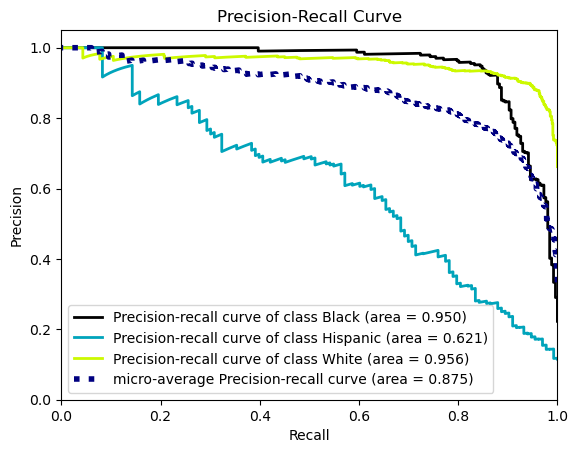

In [140]:
operations = [
    ("OneHotEncoder", column_trans),
    ("svc", SVC(C=1, class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations)

model.fit(X_train, y_train)

decision_function = model.decision_function(X_test)

# y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, decision_function)
plt.show();

In [141]:
decision_function

array([[-0.19127293,  0.84376078,  2.23009126],
       [ 0.87032988, -0.2234877 ,  2.24253775],
       [-0.22169772,  1.11838384,  2.1964494 ],
       ...,
       [-0.22395018,  2.22145516,  1.02121194],
       [-0.22630111,  2.23876125,  0.90301945],
       [-0.15848879,  0.8459969 ,  2.21278854]])

In [142]:
model.classes_

array(['Black', 'Hispanic', 'White'], dtype=object)

In [143]:
average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])

0.11246376809311558

In [144]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = average_precision_score(y_test_dummies[:, 1], decision_function[:, 1])
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [145]:
U

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [146]:
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)

column_trans = make_column_transformer((ord_enc, U), remainder="passthrough")

### Vanilla RF Model

In [147]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=97)),
]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=97))])

In [148]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

Test_Set
[[165   0  92]
 [  8   2 123]
 [  9   1 754]]
              precision    recall  f1-score   support

       Black       0.91      0.64      0.75       257
    Hispanic       0.67      0.02      0.03       133
       White       0.78      0.99      0.87       764

    accuracy                           0.80      1154
   macro avg       0.78      0.55      0.55      1154
weighted avg       0.79      0.80      0.75      1154


Train_Set
[[1041    0    0]
 [   0  546    0]
 [   0    0 3028]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1041
    Hispanic       1.00      1.00      1.00       546
       White       1.00      1.00      1.00      3028

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [149]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=101)),
]

model = Pipeline(steps=operations_rf)

scores = cross_validate(
    model, X_train, y_train, scoring=scoring, cv=5, n_jobs=-1, return_train_score=True
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.628788
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.038482
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.071574
train_f1_Hispanic           1.000000
dtype: float64

### RF Model GridsearchCV

In [150]:
param_grid = {
    "RF_model__n_estimators": [400, 500],
    "RF_model__max_depth": [2, 3],
}

In [152]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    ("RF_model", RandomForestClassifier(class_weight="balanced", random_state=97)),
]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(
    model, param_grid, scoring=recall_Hispanic, n_jobs=-1, return_train_score=True
)

In [153]:
rf_grid_model.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=97))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']))

In [154]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        n_estimators=400, random_state=97))])

In [155]:
rf_grid_model.best_params_

{'RF_model__max_depth': 3, 'RF_model__n_estimators': 400}

In [156]:
pd.DataFrame(rf_grid_model.cv_results_).loc[
    rf_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.624554
mean_train_score    0.664847
Name: 2, dtype: object

In [157]:
rf_grid_model.best_score_

0.6245537948290243

In [158]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[186  56  15]
 [ 11  89  33]
 [ 65 275 424]]
              precision    recall  f1-score   support

       Black       0.71      0.72      0.72       257
    Hispanic       0.21      0.67      0.32       133
       White       0.90      0.55      0.69       764

    accuracy                           0.61      1154
   macro avg       0.61      0.65      0.57      1154
weighted avg       0.78      0.61      0.65      1154


Train_Set
[[ 790  162   89]
 [  45  364  137]
 [ 242 1090 1696]]
              precision    recall  f1-score   support

       Black       0.73      0.76      0.75      1041
    Hispanic       0.23      0.67      0.34       546
       White       0.88      0.56      0.69      3028

    accuracy                           0.62      4615
   macro avg       0.61      0.66      0.59      4615
weighted avg       0.77      0.62      0.66      4615



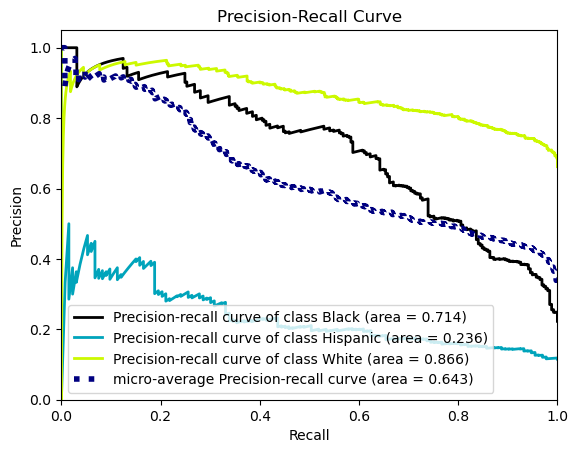

In [160]:
operations_rf = [
    ("OrdinalEncoder", column_trans),
    (
        "RF_model",
        RandomForestClassifier(
            class_weight="balanced", max_depth=2, n_estimators=400, random_state=97
        ),
    ),
]

model = Pipeline(steps=operations_rf)

model.fit(X_train, y_train)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [161]:
average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.11557518937301217

In [162]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [163]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

pipe_model_xgb = Pipeline(steps=operations_xgb)
# sorting will be same as classification_report.
y_train_xgb = y_train.map({"Black": 0, "Hispanic": 1, "White": 2})
y_test_xgb = y_test.map({"Black": 0, "Hispanic": 1, "White": 2})
# If the target is not numeric in xgb 1.6 and higher versions, it returns an error.
# That's why we do the conversion manually.


pipe_model_xgb.fit(X_train, y_train_xgb)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [164]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[206   9  42]
 [ 10  56  67]
 [ 10   9 745]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       257
           1       0.76      0.42      0.54       133
           2       0.87      0.98      0.92       764

    accuracy                           0.87      1154
   macro avg       0.85      0.73      0.77      1154
weighted avg       0.87      0.87      0.86      1154


Train_Set
[[1041    0    0]
 [   0  546    0]
 [   0    0 3028]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       546
           2       1.00      1.00      1.00      3028

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [165]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(
    class_weight="balanced", y=y_train_xgb
)
classes_weights


array([2.81746032, 1.47774576, 0.50803611, ..., 0.50803611, 1.47774576,
       0.50803611])

In [166]:
my_dict = {"weights": classes_weights, "label": y_train_xgb}

comp = pd.DataFrame(my_dict)

comp.head()

weights  label
967   2.817460      1
1674  1.477746      0
5016  0.508036      2
3155  1.477746      0
3523  0.508036      2

In [167]:
comp.groupby("label").value_counts()

label  weights 
0      1.477746    1041
1      2.817460     546
2      0.508036    3028
Name: count, dtype: int64

In [168]:
pipe_model_xgb.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [169]:
eval_metric(pipe_model_xgb, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[210   9  38]
 [  8  75  50]
 [ 11  21 732]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.86       257
           1       0.71      0.56      0.63       133
           2       0.89      0.96      0.92       764

    accuracy                           0.88      1154
   macro avg       0.84      0.78      0.81      1154
weighted avg       0.88      0.88      0.88      1154


Train_Set
[[1041    0    0]
 [   0  546    0]
 [   0    0 3028]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1041
           1       1.00      1.00      1.00       546
           2       1.00      1.00      1.00      3028

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [170]:
scoring_xgb = {
    "precision_Hispanic": make_scorer(precision_score, average=None, labels=[1]),
    "recall_Hispanic": make_scorer(recall_score, average=None, labels=[1]),
    "f1_Hispanic": make_scorer(f1_score, average=None, labels=[1]),
}

In [171]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(
    model,
    X_train,
    y_train_xgb,
    scoring=scoring_xgb,
    cv=5,
    n_jobs=-1,
    return_train_score=True,
    fit_params={"XGB_model__sample_weight": classes_weights},
)
df_scores = pd.DataFrame(scores, index=range(1, 6))
df_scores.mean()[2:]

test_precision_Hispanic     0.713656
train_precision_Hispanic    1.000000
test_recall_Hispanic        0.472527
train_recall_Hispanic       1.000000
test_f1_Hispanic            0.567567
train_f1_Hispanic           1.000000
dtype: float64

### XGBoost Model GridsearchCV

In [172]:
param_grid = {
    "XGB_model__n_estimators": [20, 40],
    "XGB_model__max_depth": [1, 2],
    "XGB_model__learning_rate": [0.03, 0.05],
    "XGB_model__subsample": [0.8, 1],
    "XGB_model__colsample_bytree": [0.8, 1],
}

In [173]:
operations_xgb = [
    ("OrdinalEncoder", column_trans),
    ("XGB_model", XGBClassifier(random_state=101)),
]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(
    model,
    param_grid,
    scoring=make_scorer(recall_score, average=None, labels=[1]),
    cv=5,
    n_jobs=-1,
    return_train_score=True,
)

In [174]:
xgb_grid_model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      col...
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=101, ...))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bytree': [0.8, 1],
                         'XGB_model__learning_rate': [0.03, 0.05],
                         'XGB_model__max_depth': [1, 2],
                         'XGB_model__n_estimators': [20, 40],
                         'XGB_model__subsample': [0.8, 1]},
             return_train_score=True,
             scoring=make_scorer(recall_score, average=None, labels=[1]))

In [175]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsampl...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.05,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=2, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=40, n_jobs=None,
                               num_parallel_tree=None,
                               objective='multi:softprob', ...))])

In [176]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.05,
 'XGB_model__max_depth': 2,
 'XGB_model__n_estimators': 40,
 'XGB_model__subsample': 0.8}

In [177]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.588007
mean_train_score    0.655219
Name: 14, dtype: object

In [178]:
pd.DataFrame(xgb_grid_model.cv_results_).loc[
    xgb_grid_model.best_index_, ["mean_test_score", "mean_train_score"]
]

mean_test_score     0.588007
mean_train_score    0.655219
Name: 14, dtype: object

In [179]:
xgb_grid_model.best_score_

0.5880066722268558

In [180]:
eval_metric(xgb_grid_model, X_train, y_train_xgb, X_test, y_test_xgb)

Test_Set
[[183  46  28]
 [ 16  80  37]
 [ 79 186 499]]
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       257
           1       0.26      0.60      0.36       133
           2       0.88      0.65      0.75       764

    accuracy                           0.66      1154
   macro avg       0.60      0.66      0.60      1154
weighted avg       0.76      0.66      0.69      1154


Train_Set
[[ 806  140   95]
 [  68  352  126]
 [ 320  672 2036]]
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1041
           1       0.30      0.64      0.41       546
           2       0.90      0.67      0.77      3028

    accuracy                           0.69      4615
   macro avg       0.63      0.70      0.63      4615
weighted avg       0.78      0.69      0.72      4615



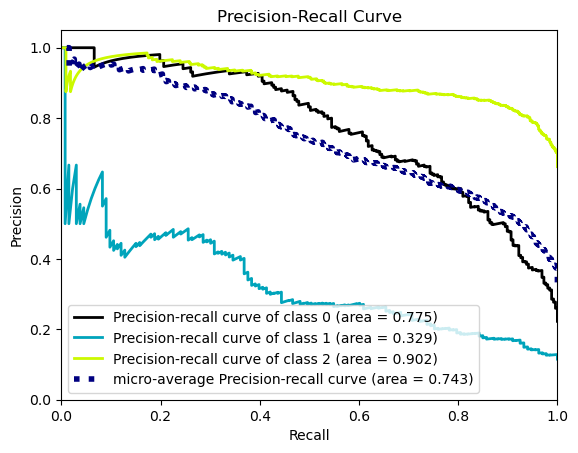

In [181]:
from scikitplot.metrics import plot_roc, precision_recall_curve


operations_xgb = [
    ("OrdinalEncoder", column_trans),
    (
        "XGB_model",
        XGBClassifier(
            colsample_bytree=0.8,
            learning_rate=0.05,
            max_depth=2,
            n_estimators=40,
            subsample=1,
            random_state=101,
        ),
    ),
]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train_xgb, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)

plot_precision_recall(y_test_xgb, y_pred_proba)
plt.show()

In [182]:
y_test_xgb_dummies = pd.get_dummies(y_test_xgb).values

In [183]:
average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])

0.3288475063709546

In [184]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_xgb_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test_xgb, y_pred, average=None, labels=[1])
xgb_recall = recall_score(y_test_xgb, y_pred, average=None, labels=[1])

---
---

## Comparing Models

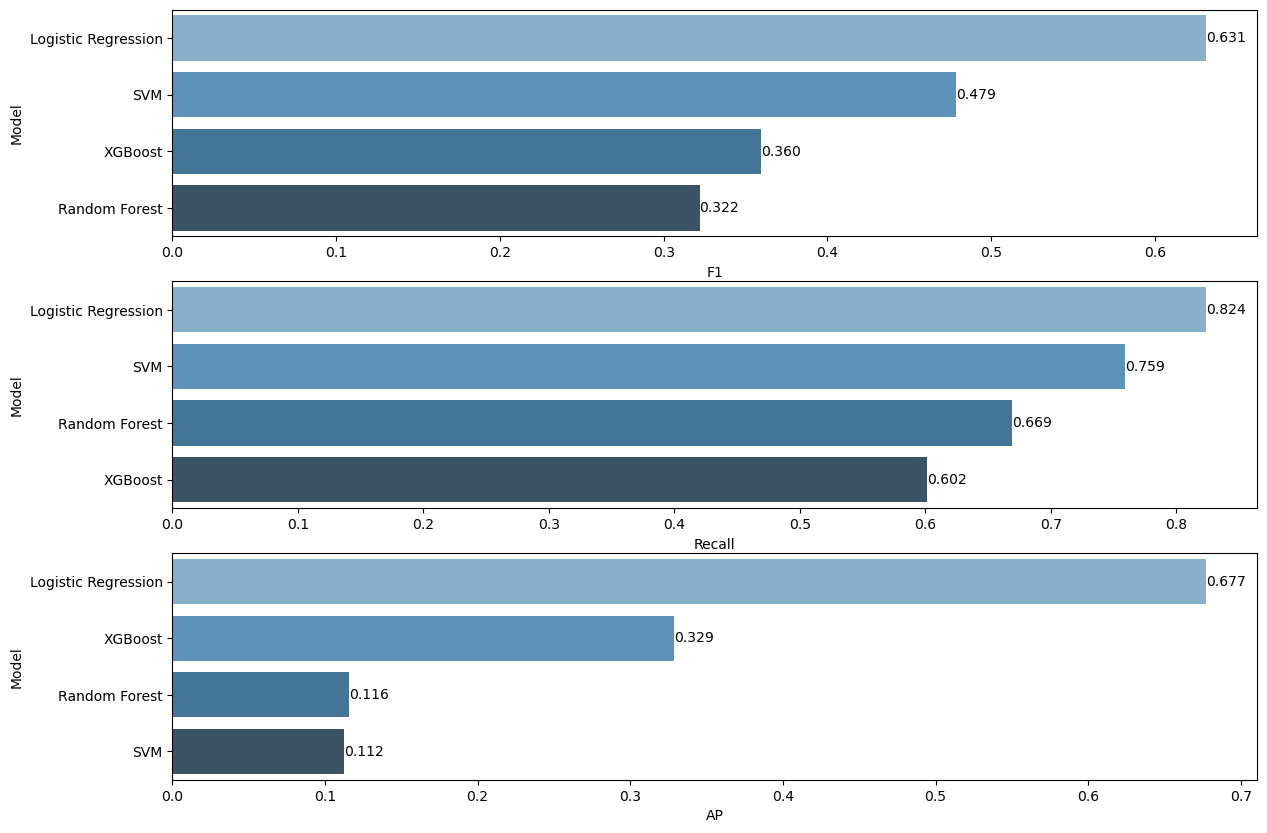

In [185]:
compare = pd.DataFrame(
    {
        "Model": ["Logistic Regression", "SVM", "Random Forest", "XGBoost"],
        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
        "AP": [log_AP, svc_AP, rf_AP, xgb_AP],
    }
)


plt.figure(figsize=(14, 10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax = sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax = sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax = sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

# Before the Deployment
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [202]:
column_trans_final = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), U),
    remainder=MinMaxScaler(),
)

operations_final = [
    ("OneHotEncoder", column_trans_final),
    (
        "log",
        LogisticRegression(class_weight="balanced", max_iter=10000, random_state=97),
    ),
]

final_model = Pipeline(steps=operations_final)

In [203]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=97))])

In [204]:
X[X.Gender == "Male"].describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  anklecircumference  axillaheight  balloffootcircumference  balloffootlength  biacromialbreadth  bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  buttockkneelength  buttockpopliteallength  calfcircumference  cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  footbreadthhorizontal  footlength  forearmcenterofgriplength  forearmcircumferenceflexed  forearmforearmbreadth  forearmhandlength  functionalleglength  handbreadth  handcircumference  handlength  headbreadth  headcircumference  headlength  heelanklecircumference  heelbreadth  hipbreadth  hipbreadthsitting  iliocristaleheight  \
count                             0.0             0.0                    0.0                 0.0           0.0                      0.0               0.0                0.0                        0.0               0.0               0.0                 0.0               0.0                        0.0                 0.0                   0.0           0.0            0.0                0.0                     0.0                0.0              0.0           0.0                 0.0         0.0          0.0           0.0                    0.0                             0.0         0.0        0.0            0.0              0.0               0.0                    0.0         0.0                        0.0                         0.0                    0.0                0.0                  0.0          0.0                0.0         0.0          0.0                0.0         0.0                     0.0          0.0         0.0                0.0                 0.0   
mean                              NaN             NaN                    NaN                 NaN           NaN                      NaN               NaN                NaN                        NaN               NaN               NaN                 NaN               NaN                        NaN                 NaN                   NaN           NaN            NaN                NaN                     NaN                NaN              NaN           NaN                 NaN         NaN          NaN           NaN                    NaN                             NaN         NaN        NaN            NaN              NaN               NaN                    NaN         NaN                        NaN                         NaN                    NaN                NaN                  NaN          NaN                NaN         NaN          NaN                NaN         NaN                     NaN          NaN         NaN                NaN                 NaN   
std                               NaN             NaN                    NaN                 NaN           NaN                      NaN               NaN                NaN                        NaN               NaN               NaN                 NaN               NaN                        NaN                 NaN                   NaN           NaN            NaN                NaN                     NaN                NaN              NaN           NaN                 NaN         NaN          NaN           NaN                    NaN                             NaN         NaN        NaN            NaN              NaN               NaN                    NaN         NaN                        NaN                         NaN                    NaN                NaN                  NaN          NaN                NaN         NaN          NaN                NaN         NaN                     NaN          NaN         NaN                NaN                 NaN   
min                               NaN             NaN                  

In [205]:
male_mean_human = X[X.Gender == "Male"].describe(include="all").loc["mean"]
male_mean_human

abdominalextensiondepthsitting    NaN
acromialheight                    NaN
acromionradialelength             NaN
anklecircumference                NaN
axillaheight                      NaN
balloffootcircumference           NaN
balloffootlength                  NaN
biacromialbreadth                 NaN
bicepscircumferenceflexed         NaN
bicristalbreadth                  NaN
bideltoidbreadth                  NaN
bimalleolarbreadth                NaN
bitragionchinarc                  NaN
bitragionsubmandibulararc         NaN
bizygomaticbreadth                NaN
buttockcircumference              NaN
buttockdepth                      NaN
buttockheight                     NaN
buttockkneelength                 NaN
buttockpopliteallength            NaN
calfcircumference                 NaN
cervicaleheight                   NaN
chestbreadth                      NaN
chestcircumference                NaN
chestdepth                        NaN
chestheight                       NaN
crotchheight

In [206]:
male_mean_human["Gender"] = "Male"
male_mean_human["SubjectsBirthLocation"] = "California"
male_mean_human["WritingPreference"] = "Right hand"

In [207]:
pd.DataFrame(male_mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength anklecircumference axillaheight balloffootcircumference balloffootlength biacromialbreadth bicepscircumferenceflexed bicristalbreadth bideltoidbreadth bimalleolarbreadth bitragionchinarc bitragionsubmandibulararc bizygomaticbreadth buttockcircumference buttockdepth buttockheight buttockkneelength buttockpopliteallength calfcircumference cervicaleheight chestbreadth chestcircumference chestdepth chestheight crotchheight crotchlengthomphalion crotchlengthposterioromphalion earbreadth earlength earprotrusion elbowrestheight eyeheightsitting footbreadthhorizontal footlength forearmcenterofgriplength forearmcircumferenceflexed forearmforearmbreadth forearmhandlength functionalleglength handbreadth handcircumference handlength headbreadth headcircumference headlength heelanklecircumference heelbreadth hipbreadth hipbreadthsitting iliocristaleheight interpupillarybreadth interscyei interscyeii kneeheightmidpatella  \
mean                            NaN            NaN                   NaN                NaN          NaN                     NaN              NaN               NaN                       NaN              NaN              NaN                NaN              NaN                       NaN                NaN                  NaN          NaN           NaN               NaN                    NaN               NaN             NaN          NaN                NaN        NaN         NaN          NaN                   NaN                            NaN        NaN       NaN           NaN             NaN              NaN                   NaN        NaN                       NaN                        NaN                   NaN               NaN                 NaN         NaN               NaN        NaN         NaN               NaN        NaN                    NaN         NaN        NaN               NaN                NaN                   NaN        NaN         NaN                  NaN   

     kneeheightsitting lateralfemoralepicondyleheight lateralmalleolusheight lowerthighcircumference mentonsellionlength neckcircumference neckcircumferencebase overheadfingertipreachsitting palmlength poplitealheight radialestylionlength shouldercircumference shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist sleeveoutseam span stature suprasternaleheight tenthribheight thighcircumference thighclearance thumbtipreach tibialheight tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa waistbacklength waistbreadth waistcircumference waistdepth waistfrontlengthsitting waistheightomphalion weightkg wristcircumference wristheight Gender SubjectsBirthLocation  Age WritingPreference  
mean               NaN                            NaN                    NaN                     NaN                 NaN               NaN                   NaN                           NaN        NaN             NaN                  NaN                   NaN                 NaN            NaN           NaN                    NaN           NaN  NaN     NaN                 NaN            NaN                NaN            NaN           NaN          NaN              NaN                 NaN                           NaN             NaN          NaN                NaN        NaN                     NaN                  NaN      NaN                NaN         NaN   Male            California  NaN        Right hand

In [209]:
from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)


0.7350844731690935

In [210]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7253627565321227

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [186]:
 !pip install imblearn

In [211]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [212]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore", sparse_output=False), U),
    remainder=MinMaxScaler(),
)

In [213]:
X_train_ohe = column_trans.fit_transform(X_train)


In [214]:
over = SMOTE()
X_train_over, y_train_over = over.fit_resample(X_train_ohe, y_train)

In [215]:
X_train_over.shape

(9084, 155)

In [216]:
y_train_over.value_counts()

DODRace
Hispanic    3028
Black       3028
White       3028
Name: count, dtype: int64

## Logistic Regression Over/ Under Sampling

## Other Evaluation Metrics for Multiclass Classification

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef?
matthews_corrcoef(y_test, y_pred)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score?
cohen_kappa_score(y_test, y_pred)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___